# PCA with KNN 실습 6. Titanic dataset


</br>

### --▶ Dataset Load

In [1]:
import pandas as pd

titanic = pd.read_excel("../dataset/titanic.xls")
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


</br>

### --▶ Data Preprocessing

In [6]:
import re

for idx, dataset in titanic[:10].iterrows():
	print(re.search('\,\s\w+(\s\w+)?\.', dataset['name']))
	print(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group())
	print(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

<re.Match object; span=(5, 12), match=', Miss.'>
, Miss.
Miss
<re.Match object; span=(7, 16), match=', Master.'>
, Master.
Master
<re.Match object; span=(7, 14), match=', Miss.'>
, Miss.
Miss
<re.Match object; span=(7, 12), match=', Mr.'>
, Mr.
Mr
<re.Match object; span=(7, 13), match=', Mrs.'>
, Mrs.
Mrs
<re.Match object; span=(8, 13), match=', Mr.'>
, Mr.
Mr
<re.Match object; span=(7, 14), match=', Miss.'>
, Miss.
Miss
<re.Match object; span=(7, 12), match=', Mr.'>
, Mr.
Mr
<re.Match object; span=(8, 14), match=', Mrs.'>
, Mrs.
Mrs
<re.Match object; span=(12, 17), match=', Mr.'>
, Mr.
Mr


In [7]:
# 이름에서 신분을 표시하는 title을 추출한다.

title=[]
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [8]:
titanic.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [9]:
# 귀족과 평민 등급을 구별

titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Dr', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev',  'Sir', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')
    
for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic.title.unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [10]:
# gender 컬럼 생성

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(titanic['sex'])
titanic['gender'] = le_sex.transform(titanic['sex'])

le_sex.classes_

array(['female', 'male'], dtype=object)

In [11]:
# grade 컬럼 생성

le_grade = LabelEncoder()
le_grade.fit(titanic['title'])
titanic['grade'] = le_grade.transform(titanic['title'])

le_grade.classes_

array(['Miss', 'Mr', 'Mrs', 'Rare_f', 'Rare_m'], dtype=object)

In [13]:
pd.DataFrame(data=[le_grade.classes_,le_grade.transform(le_grade.classes_)], index=('class', 'encoding'))

,0,1,2,3,4
class,Miss,Mr,Mrs,Rare_f,Rare_m
encoding,0,1,2,3,4


In [14]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,gender,grade
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Rare_m,1,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,0,2


In [15]:
# null이 아닌 데이터만 사용

titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  title      1045 non-null   object 
 15  gender     1045 non-null   int32  
 16  grade      1045 non-null   int32  
dtypes: float64(3), int32(2), int64(4), object(8)
memory usage: 138.8+ KB


</br>

### --▶ Data Split

In [16]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass','age','sibsp','parch','fare','gender','grade']].astype('float')
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((836, 7), (209, 7), (836,), (209,))

</br>

### --▶ PCA

#### ◾ n_components=2

In [26]:
from Ch09_0_PCA_utility import *

# 2개의 주성분 축으로 변환
pca_data, pca = get_pca_data(X_train, n_components=2)
print_variances_ratio(pca)

variance_ratio: [0.93577394 0.06326916]
Sum of variance_ratio: 0.999043100951127


In [27]:
pca_df = get_pd_from_pca(pca_data, cols=2)
pca_df['survived'] = y_train.values
pca_df

,pca_1,pca_2,survived
0,-28.763184,4.479379,0
1,41.587362,22.084594,0
2,-19.598979,-10.999936,0
3,-28.232483,-6.559632,1
4,-29.055717,-1.510811,0
...,...,...,...
831,-29.468900,-7.495103,1
832,-28.418883,12.468534,0
833,-8.596259,34.525103,1
834,39.150787,14.208957,0


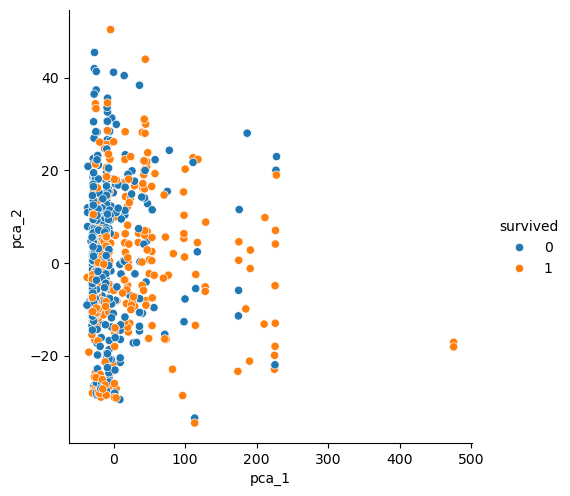

In [28]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

sns.pairplot(pca_df, hue='survived', height=5, x_vars=['pca_1'], y_vars=['pca_2']);
#--> 두 클래스의 구분이 잘 안될 것 같다.

#### ◾ n_components=3

In [29]:
pca_data, pca = get_pca_data(X_train, n_components=3)
print_variances_ratio(pca)

variance_ratio: [9.35773938e-01 6.32691630e-02 4.00903990e-04]
Sum of variance_ratio: 0.9994440049413538


In [31]:
pca_df = get_pd_from_pca(pca_data, cols=3)
pca_df['survived'] = y_train.values
pca_df.head()

,pca_1,pca_2,pca_3,survived
0,-28.763184,4.479379,-0.451531,0
1,41.587362,22.084594,0.011834,0
2,-19.598979,-10.999936,0.558167,0
3,-28.232483,-6.559632,-1.349217,1
4,-29.055717,-1.510811,-0.538886,0


In [32]:
import plotly.express as px

fig = px.scatter_3d(
	pca_df, x='pca_1', y='pca_2', z='pca_3', color='survived', symbol='survived', opacity=0.4
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

</br>

### --▶ PipeLine

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

estimators = [
	('scaler', StandardScaler()),
	('pca', PCA(n_components=3)),
	('clf', KNeighborsClassifier(n_neighbors=20))
]

pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
print(accuracy_score(y_test, pred))

0.7703349282296651


In [35]:
# ['pclass','age','sibsp','parch','fare','gender','grade']
# grade --> ['Miss', 'Mr', 'Mrs', 'Rare_f', 'Rare_m']

dicaprio = np.array([[3, 18, 0, 0, 5, 1, 1]])
print("Decaprio :", pipe.predict_proba(dicaprio)[0,1])

Decaprio : 0.1


In [36]:
pipe.predict_proba(dicaprio)

array([[0.9, 0.1]])

In [37]:
winslet = np.array([[1, 16, 1, 1, 100, 0, 3]])
print("Winslet :", pipe.predict_proba(winslet)[0,1])

Winslet : 0.85
